In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# data = "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"
# !wget $data

In [3]:
df = pd.read_csv('./CreditScoring.csv')
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [4]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
status_values = {
    1 : 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [7]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = df.income.max(), value = np.nan)

In [8]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [9]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [10]:
from sklearn.model_selection import train_test_split

df_full_train , df_test = train_test_split(df, test_size=0.20, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = (df_train.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values

In [13]:
del df_train['status']
del df_val['status']
del df_test['status']

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [15]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [16]:
dv = DictVectorizer(sparse=False)
X_train= dv.fit_transform(train_dicts)

In [17]:
list(dv.get_feature_names_out())

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
val_dicts = df_val.fillna(0).to_dict(orient='records')

In [20]:
X_val = dv.transform(val_dicts)
X_val

array([[3.10e+01, 5.50e+02, 0.00e+00, ..., 0.00e+00, 6.00e+00, 3.60e+01],
       [3.80e+01, 1.00e+03, 0.00e+00, ..., 0.00e+00, 1.80e+01, 6.00e+01],
       [4.00e+01, 7.00e+02, 0.00e+00, ..., 1.00e+00, 1.70e+01, 2.40e+01],
       ...,
       [3.60e+01, 3.90e+03, 2.90e+04, ..., 1.00e+00, 2.00e+00, 6.00e+01],
       [2.50e+01, 3.00e+02, 0.00e+00, ..., 1.00e+00, 3.00e+00, 2.40e+01],
       [3.20e+01, 1.55e+03, 6.00e+03, ..., 0.00e+00, 1.50e+01, 6.00e+01]])

In [21]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred)

0.6513465404083214

In [23]:
#controlling the depth of tree to prevent overfitting
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [24]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)

print(auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

print(auc)

0.8157582671398794
0.7551009905306241


In [25]:
from sklearn.tree import export_text

In [32]:
print(export_text(dt, feature_names= list(dv.get_feature_names_out())))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- assets <= 4500.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  4500.00
|   |   |   |   |--- class: 0
|   |   |--- income >  103.50
|   |   |   |--- expenses <= 89.00
|   |   |   |   |--- class: 0
|   |   |   |--- expenses >  89.00
|   |   |   |   |--- class: 1
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- seniority <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  2.50
|   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   | 

## Decision trees parameter tuning

In [ ]:
for d in [1,2,3,4,5,6,10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d,auc))

In [37]:
scores = []
for d in [4,5,6]: 
    for s in [1,2,5,10,15,20, 100, 200, 500]: 
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        # print('%4s %3d-> %.3f' % (d,s,auc))
        scores.append((d,s,auc))

In [39]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
24,6,100,0.781354
22,6,15,0.778438
14,5,20,0.773673
23,6,20,0.769668
15,5,100,0.768987
25,6,200,0.768642
13,5,15,0.767749
21,6,10,0.764434
11,5,5,0.763913
10,5,2,0.763005


## Random Forest

In [40]:
# It's like a group of models together vote for the decision and we take the average or max votes. 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [50]:
y_pred = rf.predict_proba(X_val)[:,1]

In [51]:
roc_auc_score(y_val, y_pred)

0.8012187885979996

In [52]:
rf.predict_proba(X_val[[0]])

array([[0.7, 0.3]])

In [58]:
scores= []
for n in range(10,201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n,auc))

In [59]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [60]:
df_scores

,n_estimators,auc
0,10,0.801219
1,20,0.812075
2,30,0.819861
3,40,0.823070
4,50,0.820854
5,60,0.824311
6,70,0.823167
7,80,0.822204
8,90,0.822598
9,100,0.823421


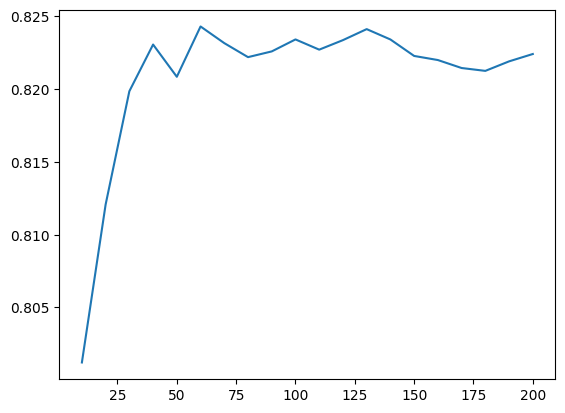

In [61]:
plt.plot(df_scores.n_estimators, df_scores.auc)

## Gradient Boosting and XGBOOST

So in Random forest ensemble learning we create various model using different features, and combine there results.

In Gradient Boosting, we create a model and then create an another model which improves the mistake of the previous model. 

In [62]:
import xgboost as xgb

In [64]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names= features)

In [70]:
xgb_params = {
    'eta' : 0.3, 
    'max_depth' : 6, 
    'min_child_weight': 1,
    
    'objective' : 'binary:logistic',
    'nthread' : 8, 
    
    'seed' : 1, 
    'verbosity' : 1 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [71]:
y_pred = model.predict(dval)

In [72]:
roc_auc_score(y_val, y_pred)

0.8098586859121842

In [73]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [78]:
%%capture output
xgb_params = {
    'eta' : 0.3, 
    'max_depth' : 6, 
    'min_child_weight': 1,
    
    'objective' : 'binary:logistic',
    
    'eval_metric' : 'auc', 
    'nthread' : 8, 
    
    'seed' : 1, 
    'verbosity' : 1 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

In [79]:
def parse_xgb_output(output): 
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it,train,val))
        
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

In [80]:
df_results = parse_xgb_output(output)

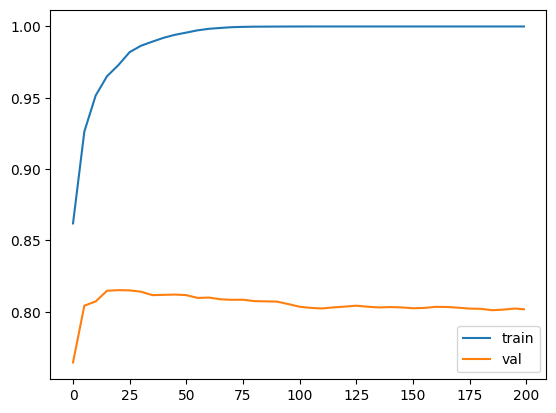

In [85]:
plt.plot(df_results.num_iter, df_results.train_auc, label='train')
plt.plot(df_results.num_iter, df_results.val_auc, label = 'val')

plt.legend()

In [86]:
#Now the whole idea is to find parameters to maximise the effectiveness of the model.
# so you can try to optimize the various parts of the equation to maximize it. 
# 1. ETA 2. Depth 3. Min_child_weight

In [87]:
xgb_params = {
    'eta' : 0.1, 
    'max_depth' : 3, 
    'min_child_weight': 30,
    
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    
    'nthread' : 8, 
    
    'seed' : 1, 
    'verbosity' : 1 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175, verbose_eval=5, evals=watchlist)

[0]	train-auc:0.76588	val-auc:0.73459
[5]	train-auc:0.82076	val-auc:0.77238
[10]	train-auc:0.83663	val-auc:0.78714
[15]	train-auc:0.85125	val-auc:0.79948
[20]	train-auc:0.85726	val-auc:0.80525
[25]	train-auc:0.86639	val-auc:0.81458
[30]	train-auc:0.87058	val-auc:0.81775
[35]	train-auc:0.87397	val-auc:0.81961
[40]	train-auc:0.87769	val-auc:0.82385
[45]	train-auc:0.87987	val-auc:0.82484
[50]	train-auc:0.88222	val-auc:0.82573
[55]	train-auc:0.88431	val-auc:0.82869
[60]	train-auc:0.88541	val-auc:0.82872
[65]	train-auc:0.88622	val-auc:0.82970
[70]	train-auc:0.88786	val-auc:0.83084
[75]	train-auc:0.88874	val-auc:0.83038
[80]	train-auc:0.89037	val-auc:0.83129
[85]	train-auc:0.89111	val-auc:0.83205
[90]	train-auc:0.89213	val-auc:0.83240
[95]	train-auc:0.89316	val-auc:0.83311
[100]	train-auc:0.89409	val-auc:0.83371
[105]	train-auc:0.89512	val-auc:0.83423
[110]	train-auc:0.89576	val-auc:0.83488
[115]	train-auc:0.89658	val-auc:0.83525
[120]	train-auc:0.89707	val-auc:0.83523
[125]	train-auc:0.8977